# Train on real data - Transfer Learning

In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from utils import *
from models import *
from classes import *
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
STUDY_PATH = config.STUDY_PATH
GEN_DFS_PATH = config.GEN_DFS_PATH
REAL_FILE = config.REAL_FILE
TPL_PATH = config.TPL_PATH

TRAIN_VAL_RATIO_REAL = config.TRAIN_VAL_RATIO_REAL
TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_REAL, TRAIN_VAL_RATIO_GEN

('C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/gens',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/real.csv',
 'C:\\Users\\Asus\\Desktop\\Skoltech\\Multiphase flows\\olga_proj\\Subsea_Study[7]',
 0.3333333333333333,
 0.8)

## 2. Train real transfer

### MLP

#### Transfer

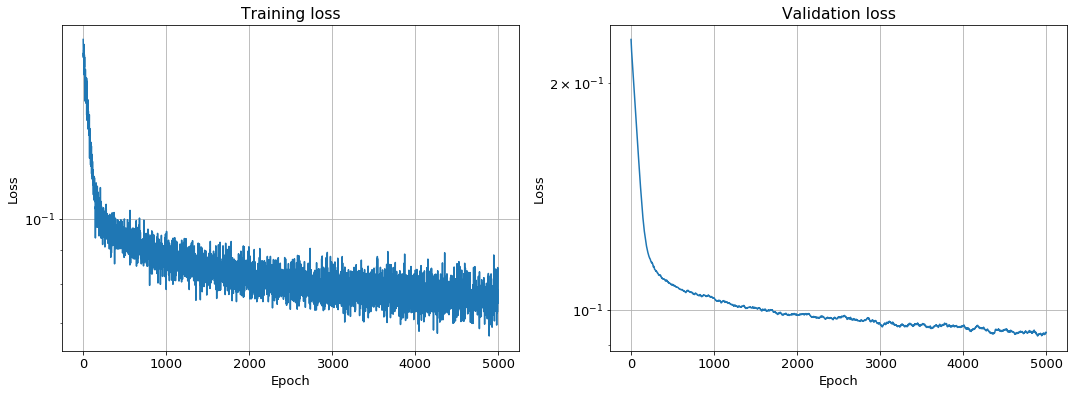

Model name:       MLP-1
Training time:    79.272 sec
Train error:      6.032
Val error:        8.594
Test error:       10.834
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/MLP-1-transf.hdf saved


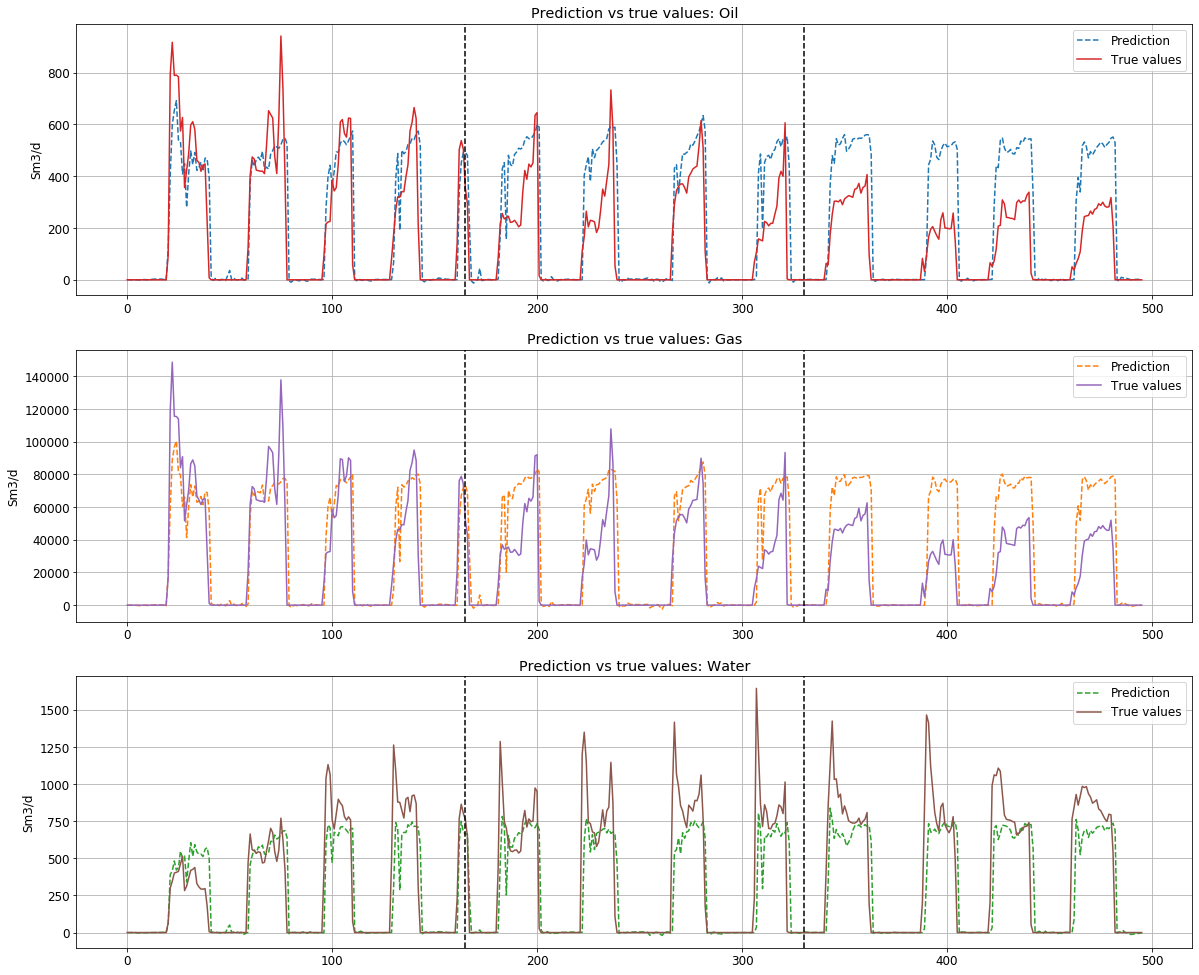

In [12]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

#### Tuning

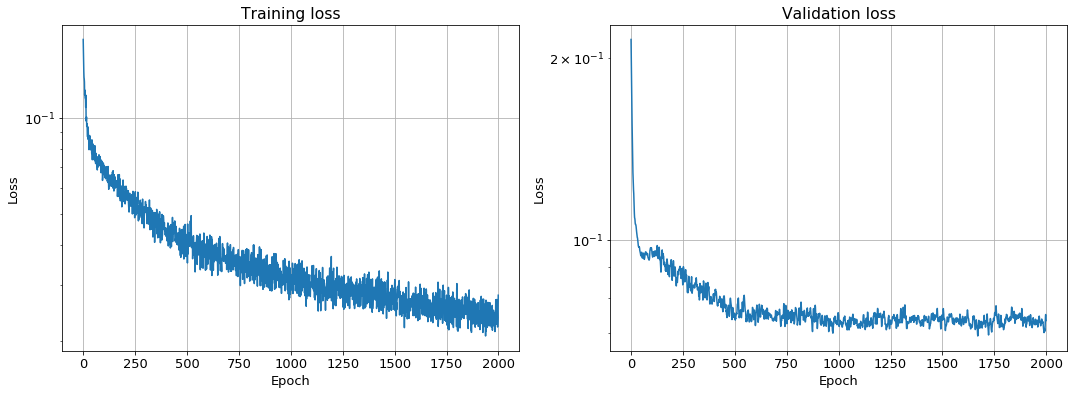

Model name:       MLP-1
Training time:    51.564 sec
Train error:      1.367
Val error:        6.686
Test error:       8.029
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/MLP-1-tuning.hdf saved


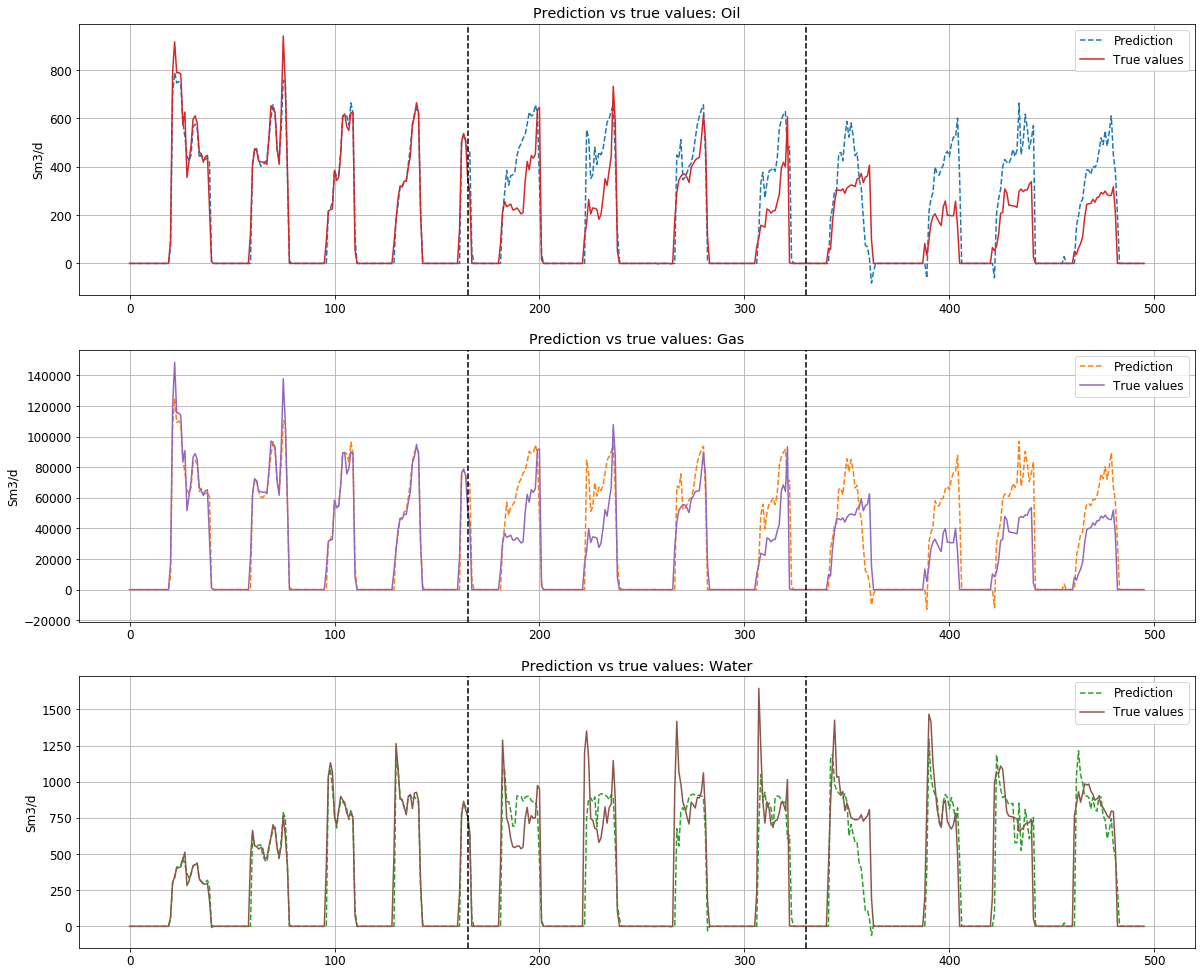

In [9]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

#### Transfer -> Tuning

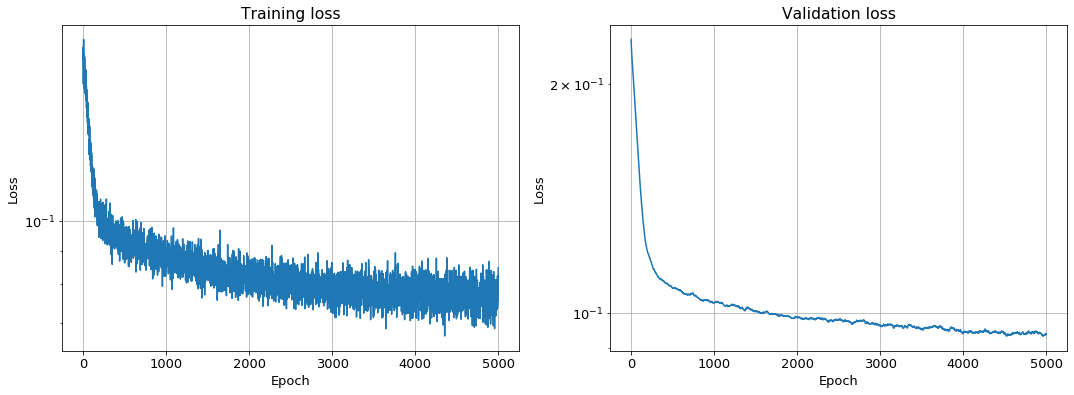

Model name:       MLP-1
Training time:    79.059 sec
Train error:      6.042
Val error:        8.644
Test error:       10.907


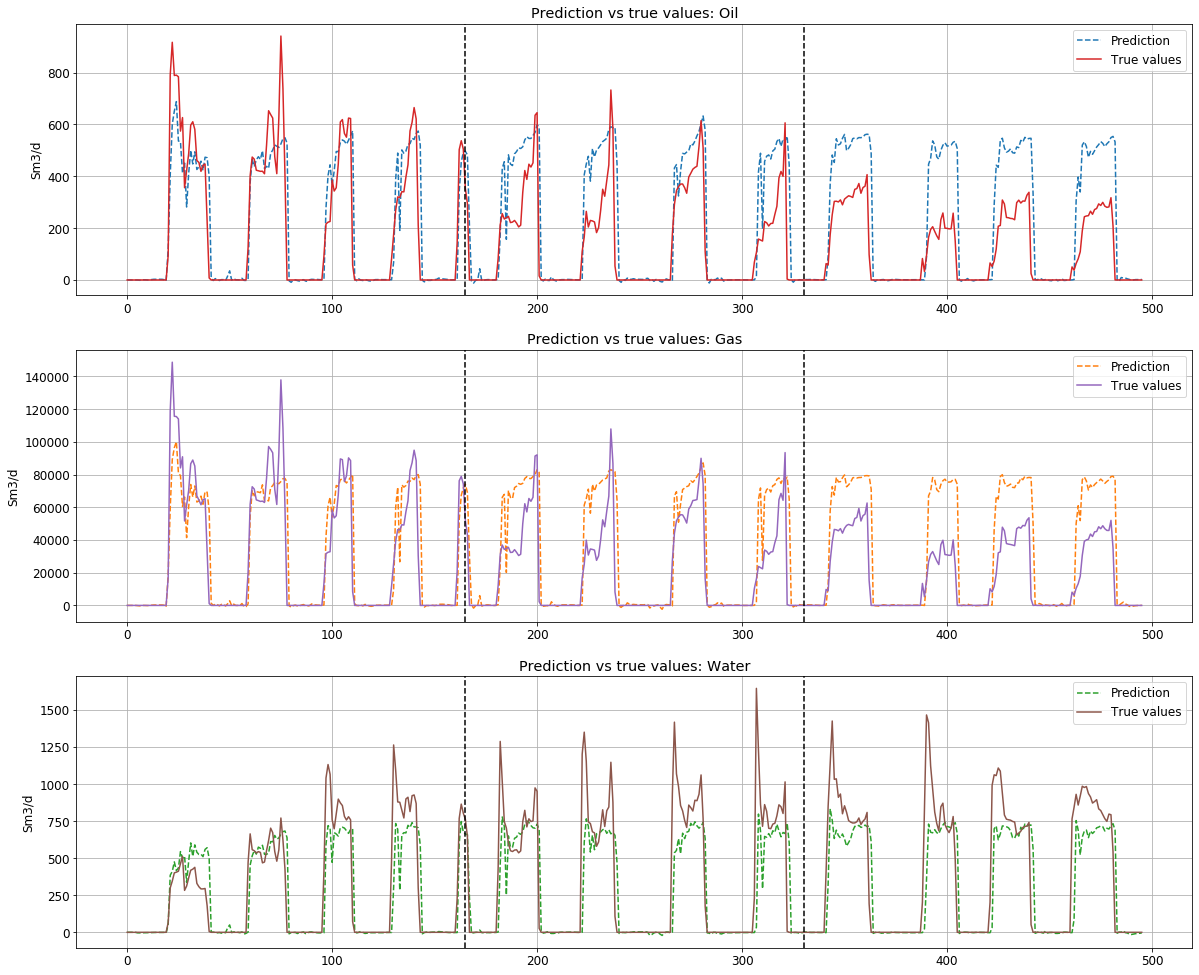

In [13]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

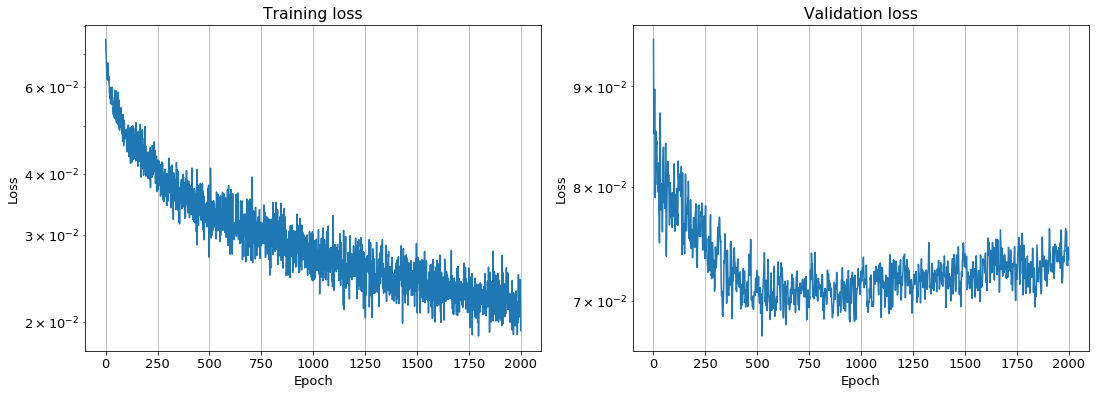

Model name:       MLP-1
Training time:    53.918 sec
Train error:      1.266
Val error:        6.658
Test error:       7.712


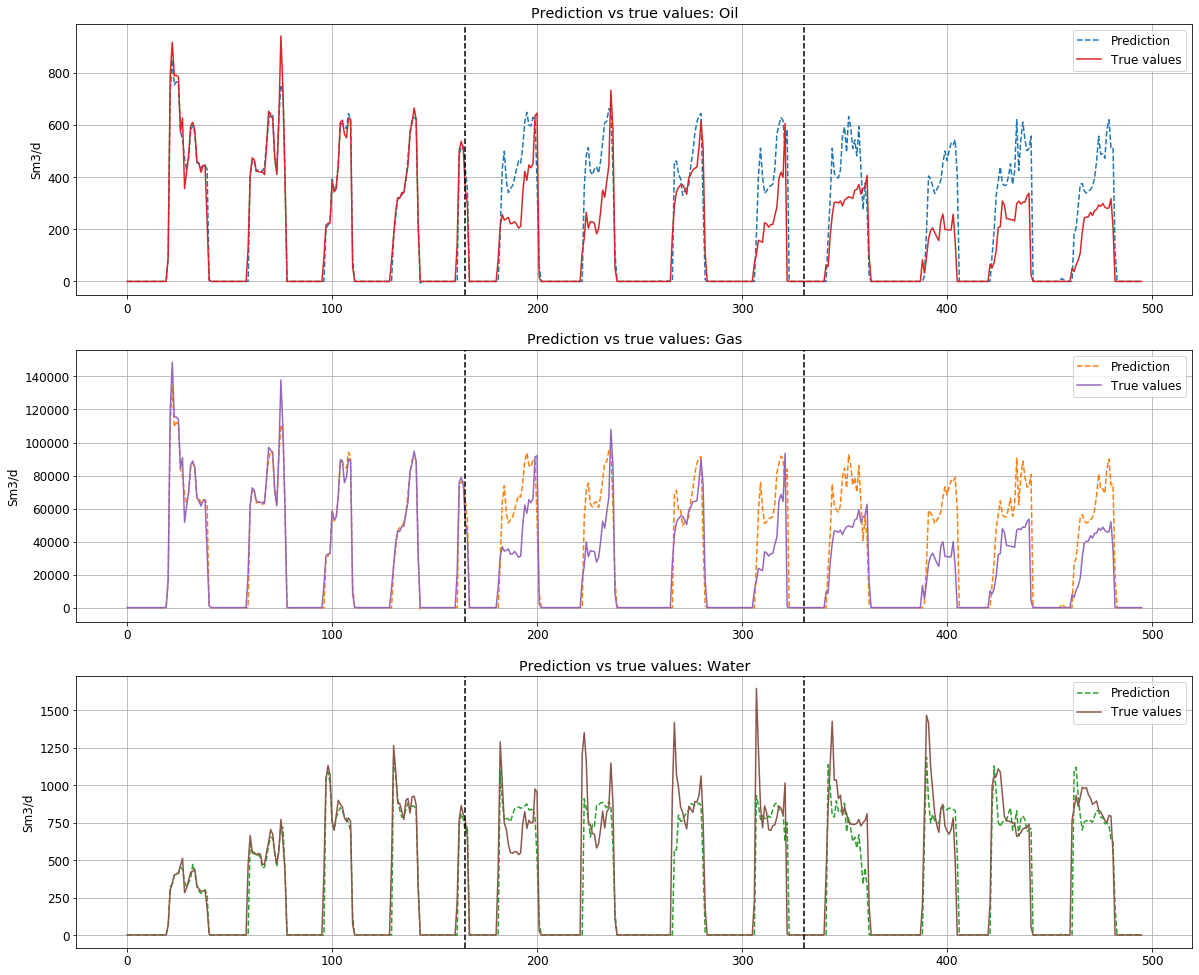

In [14]:
m.train(n_epochs=2000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

### TCN

#### Transfer

In [22]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

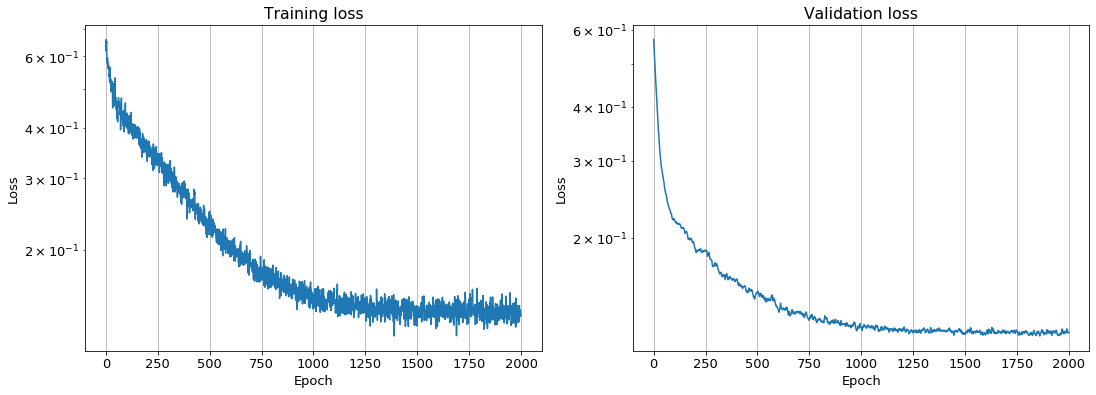

Model name:       TCN-1
Training time:    119.475 sec
Train error:      10.698
Val error:        10.940
Test error:       10.137
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-transf.hdf saved


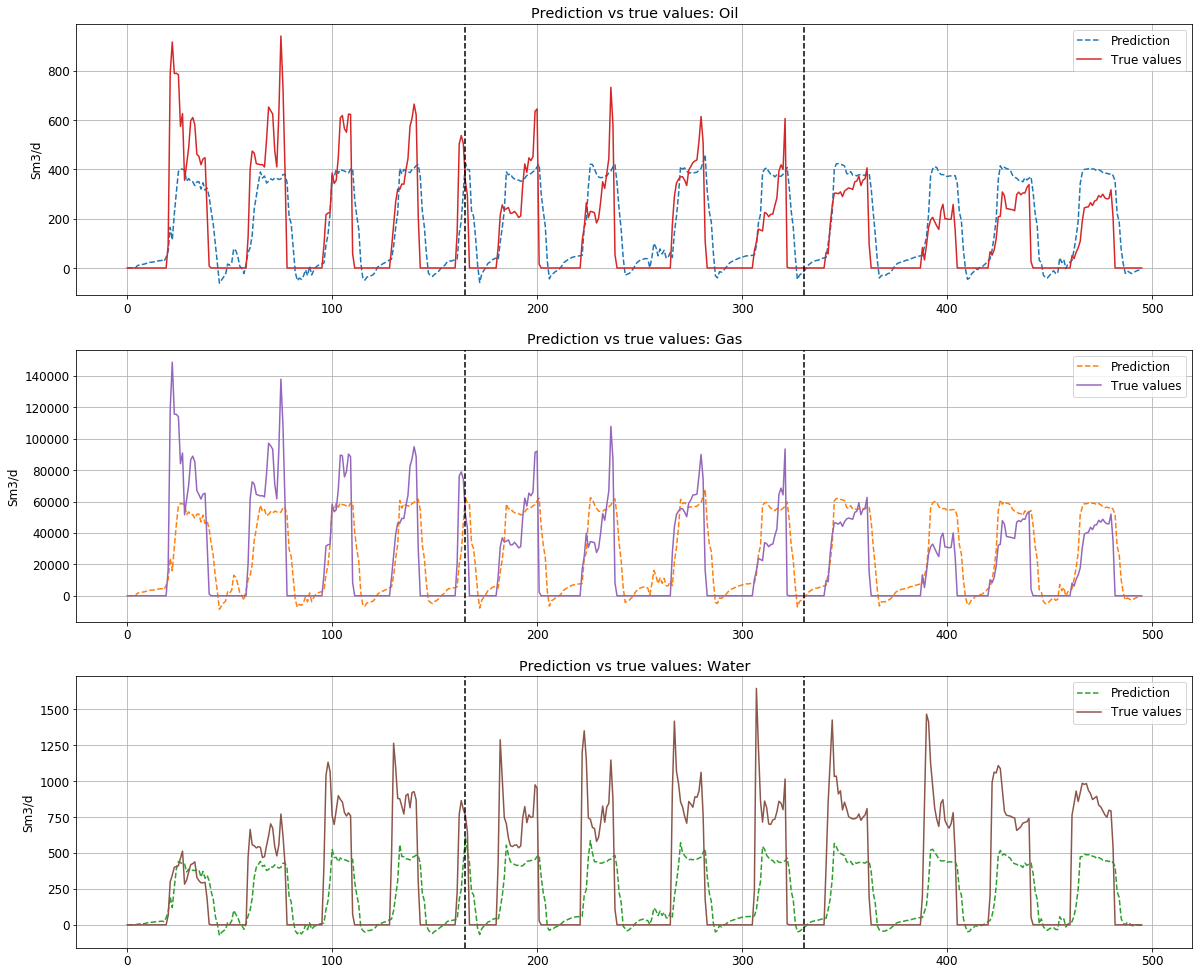

#### Tuning

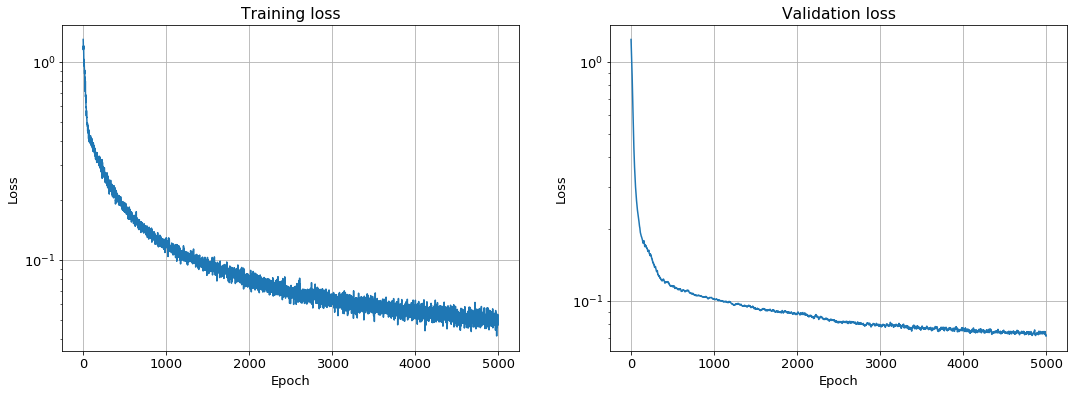

Model name:       TCN-1
Training time:    435.899 sec
Train error:      3.992
Val error:        6.172
Test error:       5.302
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-tuning.hdf saved


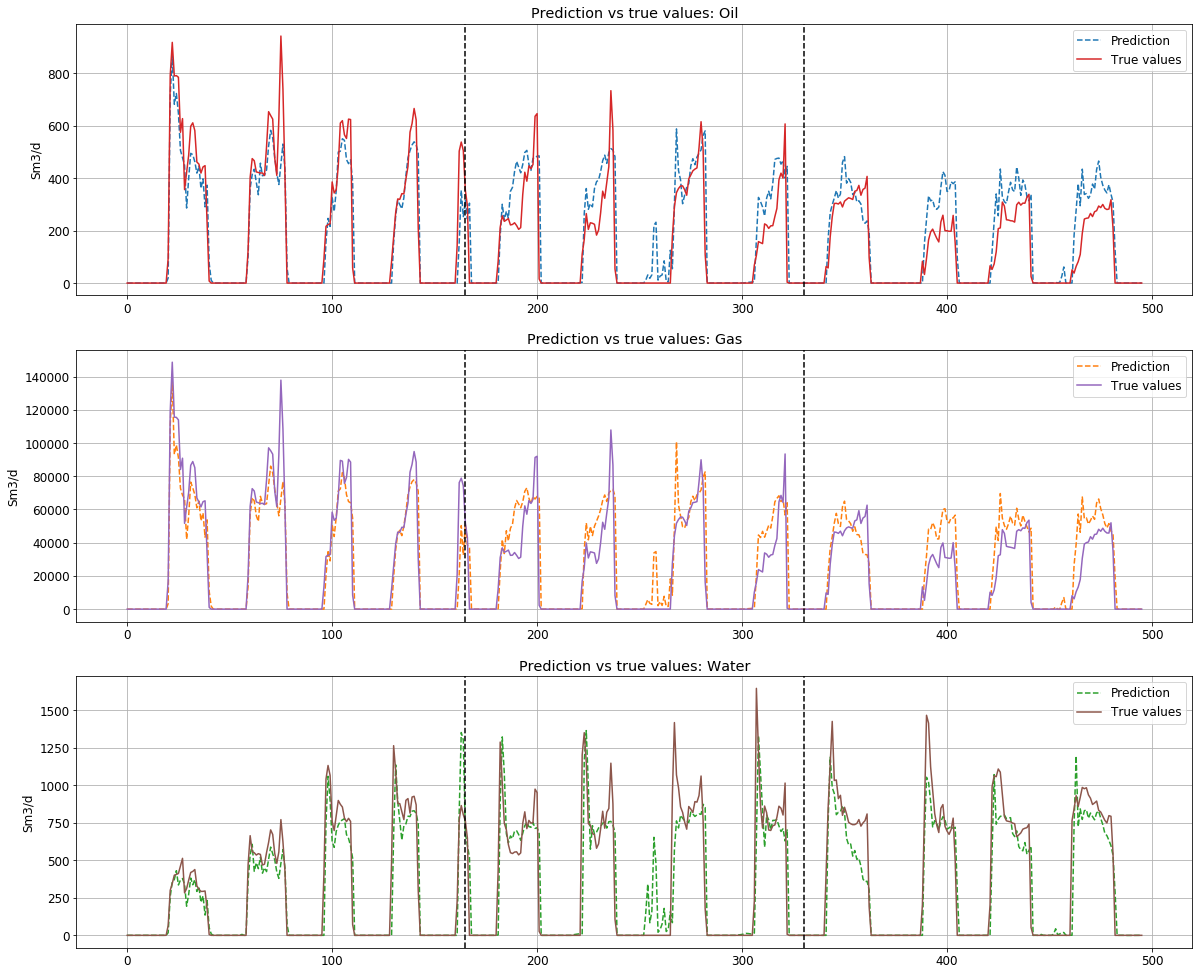

In [25]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-5)

m.train(n_epochs=5000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

In [33]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='TCN-1', 
           study_path=STUDY_PATH, 
           real_file=REAL_FILE, 
           train_all_ratio=TRAIN_VAL_RATIO_REAL, 
           loss='mae', 
           lr=1e-5)

    m.train(n_epochs=6000, tuning=True, verbose=False)
    m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 6.05+-0.66


#### Transfer -> Tuning

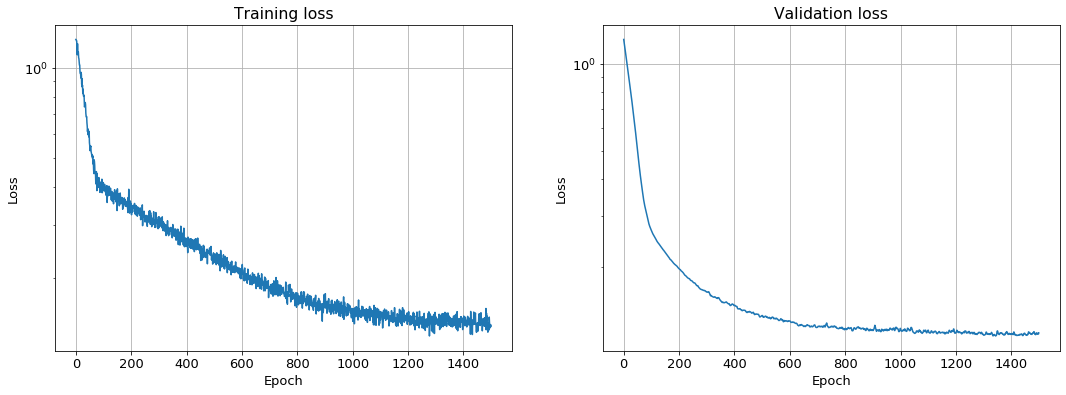

Model name:       TCN-1
Training time:    88.469 sec
Train error:      10.999
Val error:        10.773
Test error:       10.259
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-transf.hdf saved


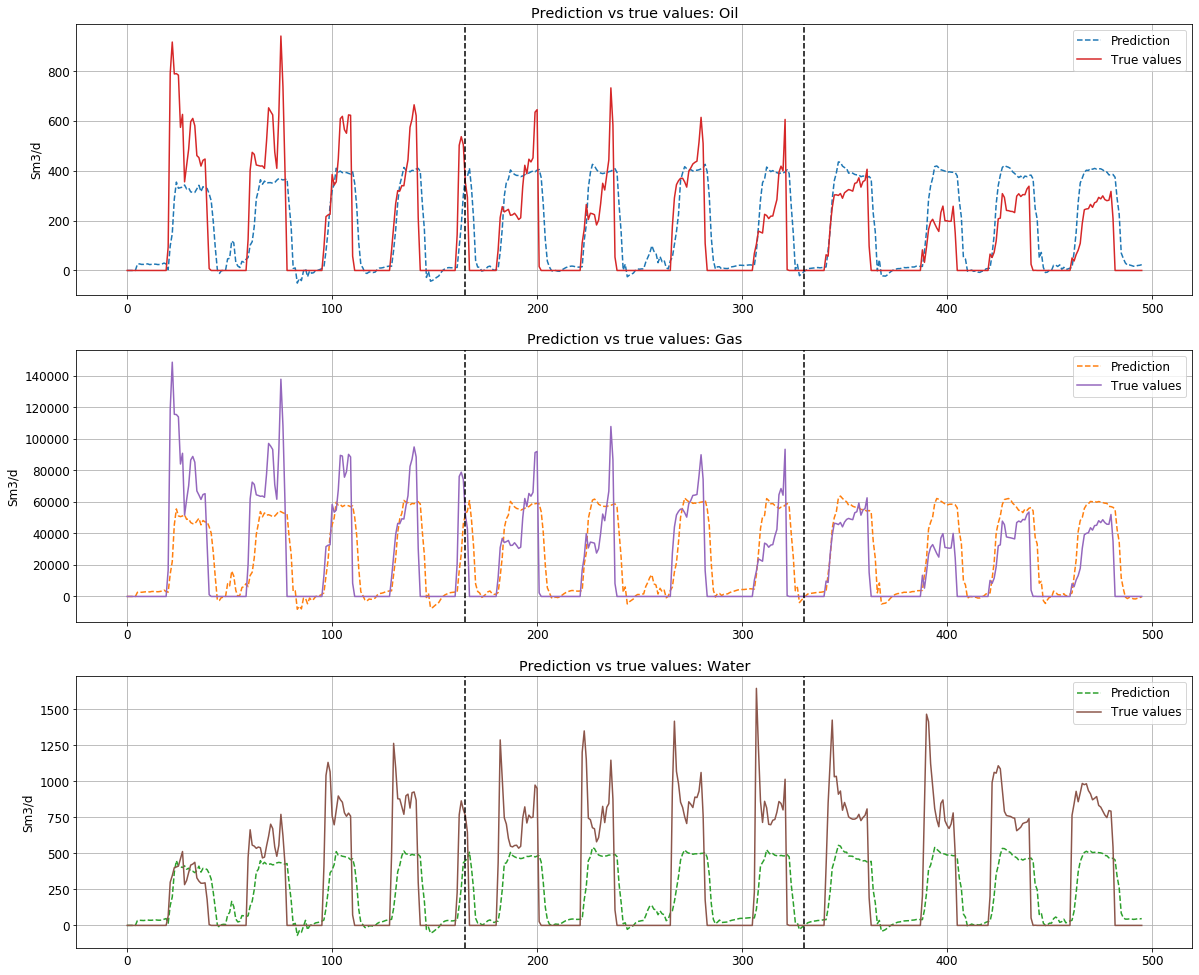

In [26]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=1500, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

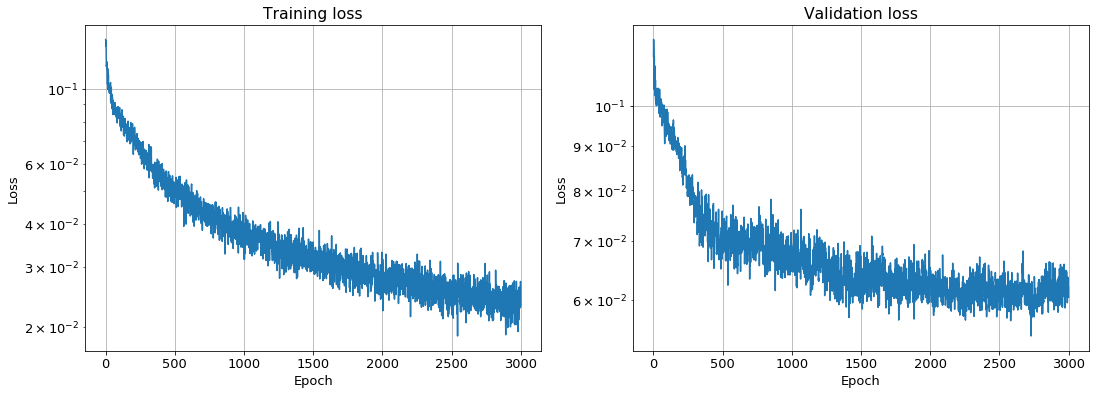

Model name:       TCN-1
Training time:    260.549 sec
Train error:      1.706
Val error:        5.372
Test error:       6.828
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-tuning.hdf saved


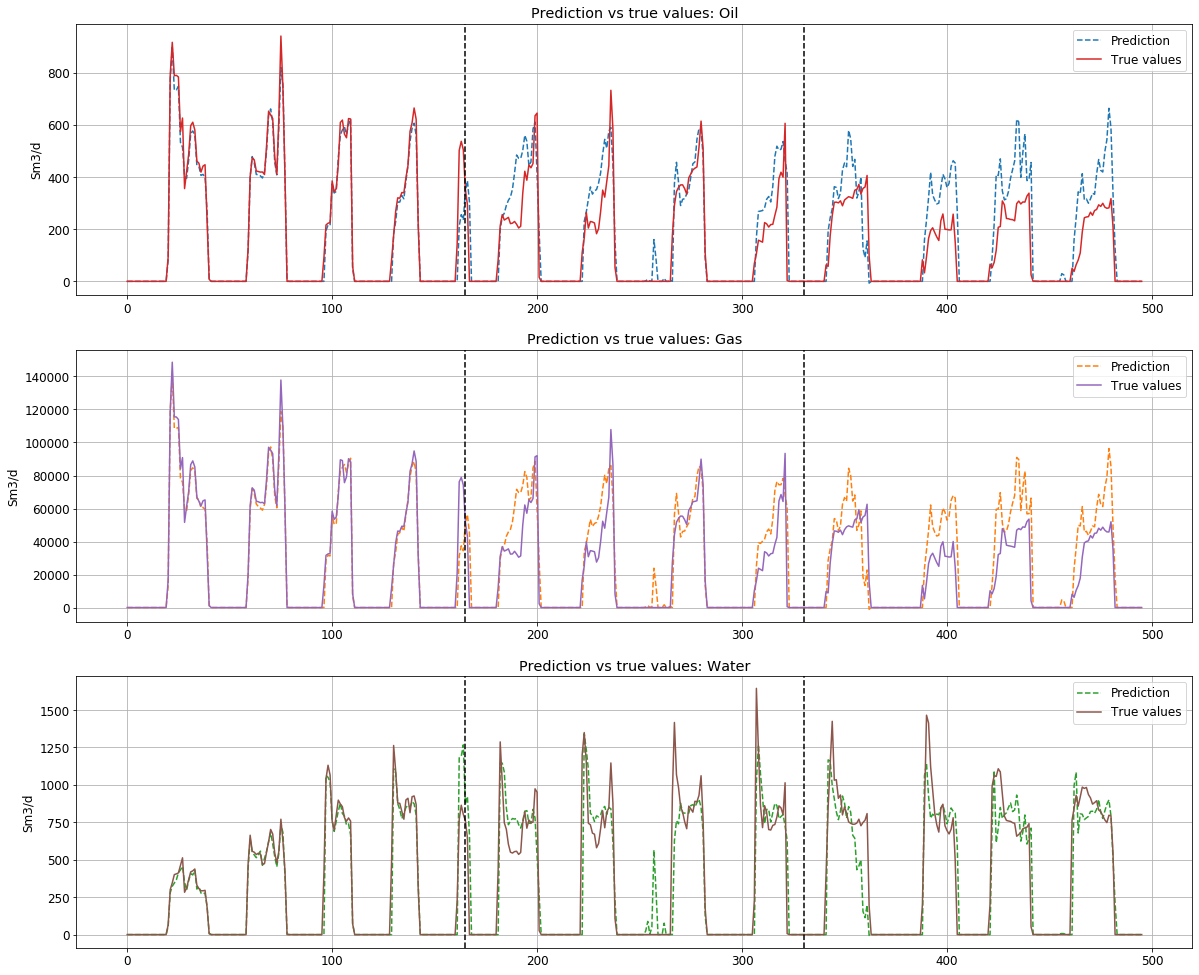

In [27]:
m.train(n_epochs=3000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

### LSTM

#### Transfer

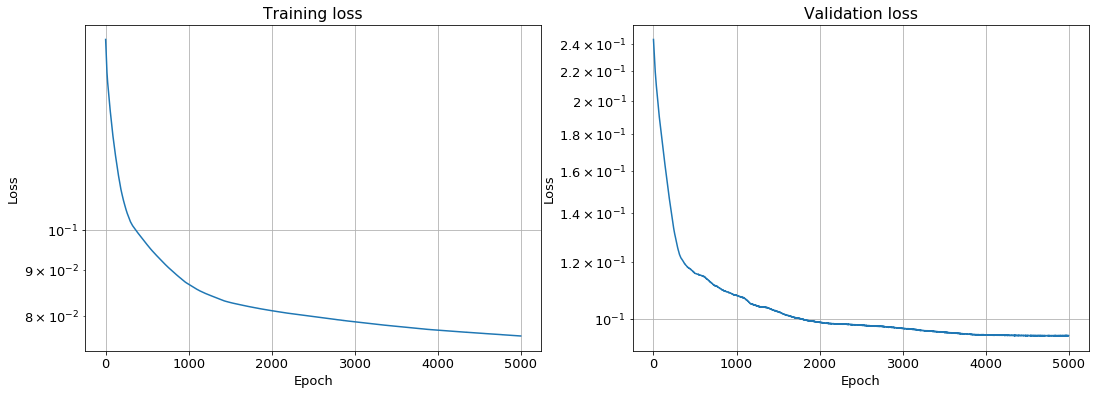

Model name:       LSTM-1
Training time:    269.282 sec
Train error:      6.846
Val error:        8.853
Test error:       9.696
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/LSTM-1-transf.hdf saved


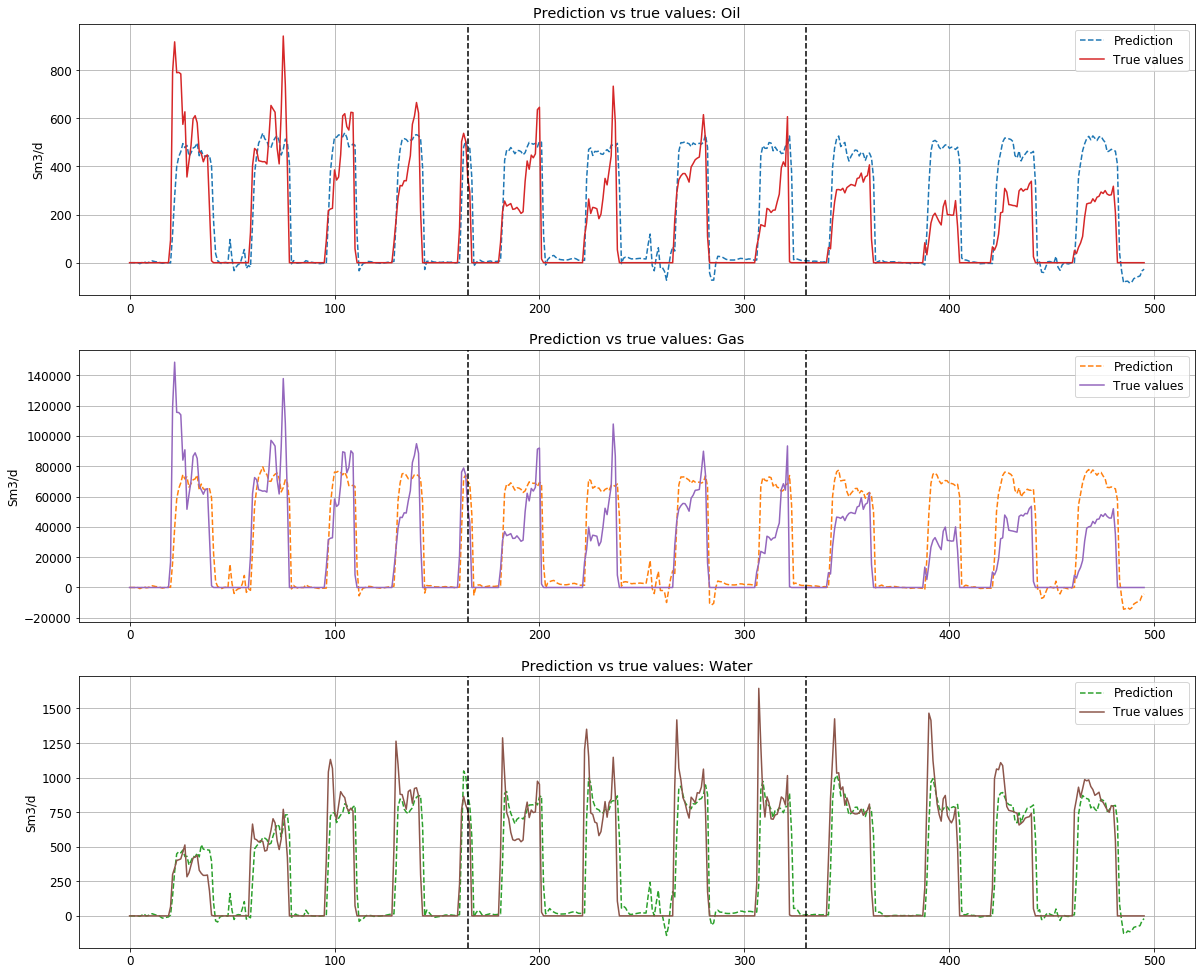

In [35]:
m = TL(model_name='LSTM-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

#### Tuning

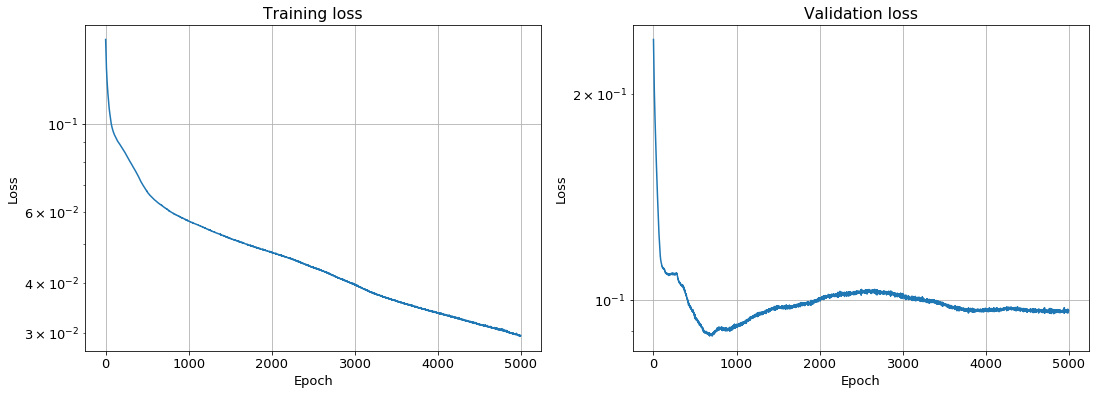

Model name:       LSTM-1
Training time:    295.126 sec
Train error:      2.591
Val error:        9.079
Test error:       7.329
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/LSTM-1-tuning.hdf saved


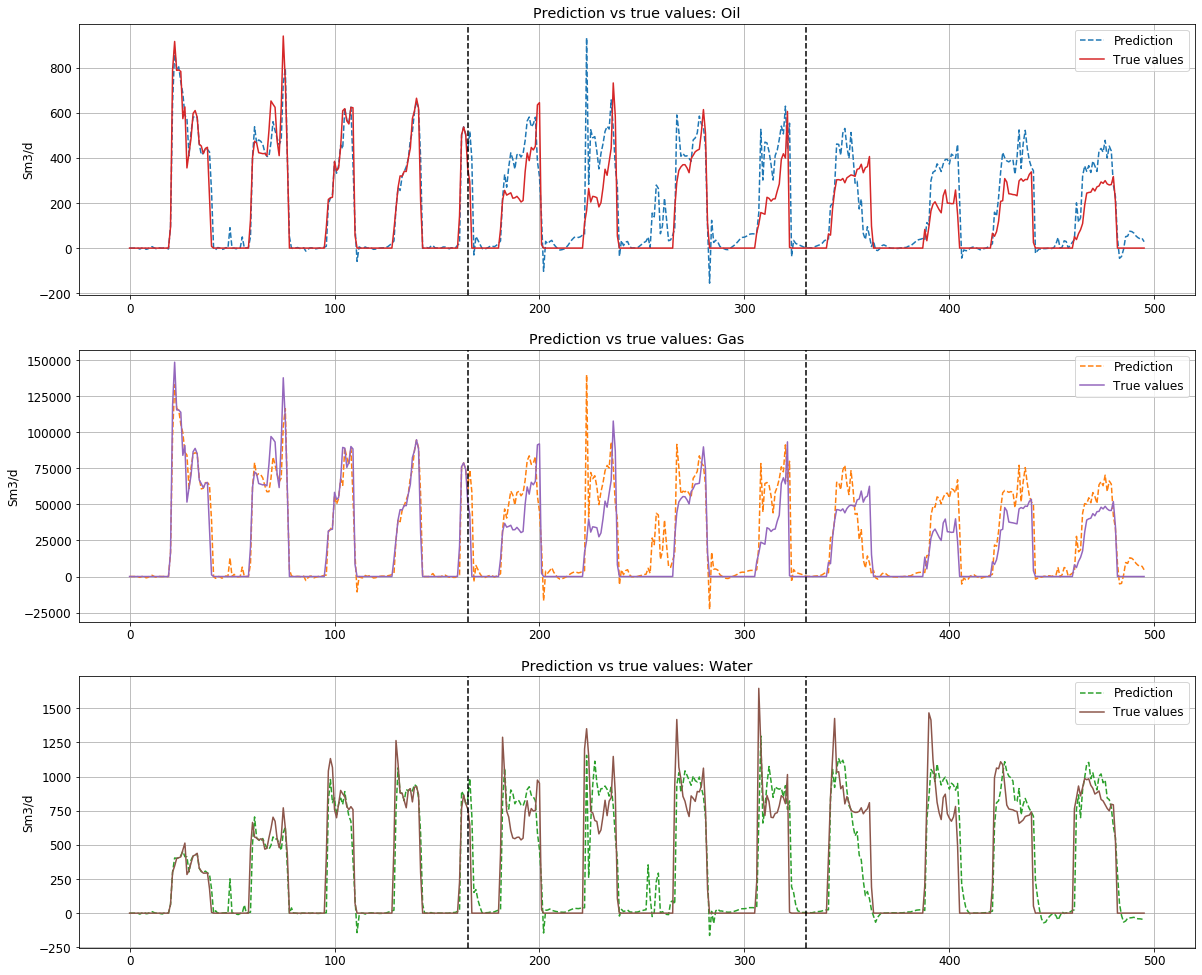

In [36]:
m = TL(model_name='LSTM-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()